# Insper - Modelagem e Simulação do Mundo Físico 

## Diagnóstico de programação 1 - 19/04/2021

---

Na **aula 7**, estudamos o modelo **SIR** (**S**usceptible, **I**nfected, **R**ecovered), muito usado para fazer previsões de curvas de infectados em processos epidêmicos. O modelo SIR também pode ser usado para o estudo da dinâmica de infecções de culturas de bactérias pluricelulares por vírus, sendo a modelagem contínua a mais usual. Vamos considerar um modelo **SI**, apenas com estoques de bactérias **S**usceptíveis e **I**nfectadas, cujas equações diferenciais são representadas abaixo.

$$\frac{dS(t)}{dt}= -\alpha \cdot S(t)\cdot I(t)$$

$$\frac{dI(t)}{dt}= \alpha \cdot S(t)\cdot I(t)-\beta \cdot I(t)$$

Nesse sistema de equações diferenciais, $S(t)$ e $I(t)$ são, respectivamente, os **percentuais** de populações de bactérias susceptíveis e infectadas, sendo $t$ dado em horas.

---
#### Item 0 (0,0 pontos)

Antes de começar, execute o código abaixo para importar todas as bibliotecas necessárias.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

---
#### Item 1 (2,0 pontos)

Implemente uma função (com o nome que quiser) que será utilizada posteriormente pela função `odeint` para resolver esse sistema de equações diferenciais. 

Essa função deve receber:
- Uma **lista** com os valores de $S(t)$ e $I(t)$ em um determinado instante de tempo $t$
- O **instante de tempo** $t$

E deve retornar:
- Uma **lista** com as taxas de variação (derivadas) $\dfrac{dS(t)}{dt}$ e $\dfrac{dI(t)}{dt}$ no instante de tempo $t$

**Importante:**
Os parâmetros $\alpha$ e $\beta$ do sistema acima, ambos dados na unidade $\left[\frac{1}{h}\right]$, são definidos da seguinte forma:

$$\alpha=0,5 + \frac{\text{Dia do seu aniversário}}{100}\space $$

$$\beta=0,08 - \frac{\text{Mês do seu aniversário}}{1000}\space $$

*Obs: com certeza, o dia do seu aniversário será um número de 1 a 31 e, o mês, um número de 1 a 12.*


In [15]:
def modelo (x,t):
    # primeira posição é relacionado as varoaveis 
    # caso tenha mais de uma tratar como vetor
    S = x[0]
    I = x[1]
    #VALORES DAS CONTANTES
    alpha = 0.5 + (29/100)
    beta = 0.08 - (5/1000)
    #após as variaveis dadas vamos contruir as derivadas
    dSdt = -alpha*S*I
    dIdt = alpha*S*I - beta*I
    # retorna as derivadas como vetor
    dxdt = [dSdt,dIdt]
    # d1 e d2 são argumentos adicionais, estes devem ser informados em arg = (d1,d2) dentro de odeint
    return dxdt


---

#### Item 2 (2,0 pontos)

Utilizando a função que você implementou no **Item 1** (**não copie o código da função novamente** na célula a seguir), resolva o sistema de equações diferenciais utilizando a função `odeint`.

Para isso:
- Considere como condições iniciais $S(0) = 1$ e $I(0) = 10^{-4}$
- Crie uma lista de tempo de $0$ a $65h$ com $\Delta t=0,01h$

Em seguida, plote em uma **mesma** figura o gráfico de $S(t)$ por $t$ e o gráfico de $I(t)$ por $t$. 

*(Obs: esse gráfico representa o percentual de bactérias susceptíveis e infectadas em um período de 65 horas.)*

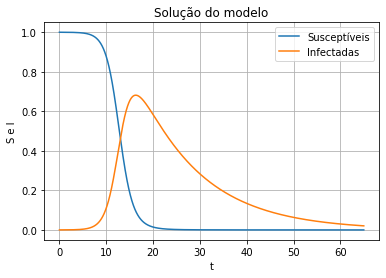

In [16]:
# Implemente seu código do Item 2 abaixo
#condições iniciais
S_0 = 1
I_0 = 1e-4
CI = [S_0,I_0]
#parametros para criar o eixo x com o numpy
delta_t = 1e-2
inicio = 0
fim = 65
#vetor do eixo x
t_lista = np.arange(inicio,fim,delta_t)
#calculando a integral com odeint
y_lista = odeint(modelo,CI,t_lista)
# primeiro argumento é a função
# o segundo as condições iniciais
# o terceiro é o vetor temporal

#vamos separar as listas com as integrais
# coluna 0 é a primeira variável
# a coluna 1 é a segunda
S_lista = y_lista[:,0]
I_lista = y_lista[:,1]

plt.plot(t_lista,S_lista, label = "Susceptíveis")
plt.plot(t_lista,I_lista, label = "Infectadas")

plt.ylabel("S e I")
plt.xlabel("t")
plt.legend()
plt.title("Solução do modelo")
plt.grid(True)
plt.show()



---

#### Item 3 (1,0 ponto)

Nas condições do **Item 2**, qual o percentual máximo de bactérias infectadas? Dê sua resposta na forma de um `print` com duas casas decimais de precisão.

In [17]:
# Implemente seu código do Item 3 abaixo
i_max = max(I_lista)

print("O percentual máximo de bactérias é: {:.2f}".format(i_max))


O percentual máximo de bactérias é: 0.68


---

#### Item 4 (1,0 ponto)

Ainda nas condições do **Item 2**, quando (em que instante) o percentual máximo de bactérias infectadas é atingido? Dê sua resposta na forma de um `print`, em horas, com duas casas decimais de precisão.

In [21]:
# Implemente seu código do Item 4 abaixo
t_max = 0
for i in range(0,len(I_lista)):
    if (I_lista[i] == i_max):
        t_max = t_lista[i]
print("O instante de tempo do percentual máximo é: {:.2f}h".format(t_max))


O instante de tempo do percentual máximo é: 16.30h


---

#### Item 5 (4,0 pontos)

Utilizando a função que você implementou no **Item 1** e as condições iniciais e lista de tempo do **Item 2** (**não copie os códigos novamente** na célula a seguir), resolva o sistema de equações diferenciais novamente, porém agora utilizando o **método de Euler**. 

Em seguida, plote em uma **mesma** figura o gráfico de $S(t)$ por $t$ e o gráfico de $I(t)$ por $t$. 

*(Obs: caso você não consiga implementar o método de Euler utilizando a função do **Item 1**, você pode implementá-lo da forma que preferir. Porém, se você não usar a função do **Item 1**, este item valerá metade.)*

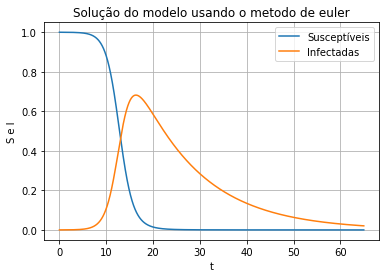

In [26]:
# Implemente seu código do Item 5 abaixo
# o vetor tempo já foi criado
# basta criar um novo vetor para S e outro para I
# e adicionar os valores iniciais aos respectivos vetores

S_euler = [1]
I_euler = [1e-4]
dxdt = [0,0]

for i in range(1,len(t_lista)):
    x = [S_euler[i-1],I_euler[i-1]]
    lista1 = modelo(x,t_lista[i-1])
    S_euler.append(S_euler[i-1] + lista1[0]*delta_t)
    I_euler.append(I_euler[i-1] + lista1[1]*delta_t)
    
# os vetores de S e I foram recriados

plt.plot(t_lista,S_euler, label = "Susceptíveis")
plt.plot(t_lista,I_euler, label = "Infectadas")

plt.ylabel("S e I")
plt.xlabel("t")
plt.legend()
plt.title("Solução do modelo usando o metodo de euler")
plt.grid(True)
plt.show()


